In [1]:
import networkx as nx

# NetworkX Data Capabilities

NetworkX has many built in functions to read data from a variety of formats. Because formats can be pretty esoteric this is also the source of many bugs. Please if you find them report them. Here is a brief list of the file formats NetworkX can read and write, and their corresponding function names

| Format | Read Function | Write Function |
| - | -| -|
| Adjacency List| `nx.read_adjlist` | `nx.write_adjlist`|
| Edge List |`nx.read_edgelist` | `nx.write_edgelist`|
| Graph Exchange XML Format (GEXF)| `nx.read_gexf` |`nx.write_gexf`|
| Graph Modeling Language (GML)| `nx.read_gml` |`nx.write_gml`|
| GraphML | `nx.read_graphml` |`nx.write_graphml`|
| Leda | `nx.read_leda` | `nx.write_leda`|
| Multiline Adjacency List| `nx.read_multiline_adjlist` | `nx.write_multiline_adjlist`|
| pajek|`nx.read_pajek` | `nx.write_pajek`|
| sparse6|`nx.read_sparse6` | `nx.write_sparse6`|

## Exercise

1. Create a simple graph with few nodes and edges. Save it to the `./data/` folder as GML.
2. Read the same graph and save it to the `./data/` folder using another format.

# Creating Graphs from Other Python Data Structures

## Matrices and Arrays

It is often useful to create graphs from other types of python data structures. In particular, graphs are often represented by matrices. If your data has a matrix represenatation, NetworkX can easily create a graph using `from_numpy_matrix`

In [2]:
import numpy as np

In [3]:
n = 25
A = np.random.binomial(1,1.1/n,size=(n,n)) # Random 1/s with probability 1/25

print(A)

[[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 

In [4]:
G = nx.from_numpy_array(A)

In [5]:
G.order()

25

In [6]:
G.size()

22

In [7]:
G.degree()

DegreeView({0: 2, 1: 2, 2: 3, 3: 2, 4: 3, 5: 2, 6: 1, 7: 2, 8: 0, 9: 1, 10: 2, 11: 2, 12: 1, 13: 2, 14: 4, 15: 0, 16: 0, 17: 1, 18: 1, 19: 0, 20: 3, 21: 4, 22: 2, 23: 1, 24: 3})

### Quick Quiz...

What kind of graph is the one above?

NetworkX can handle other data structures such as a list of edges (`from_edgelist`) and `scipy` sparse matrices (`scipy_sparse_matrix`). You can use the `create_using` keyword to make a `DiGraph`s or `MultiGraph`s.

In [8]:
edges = []

for u in range(n):
    for v in range(n):
        if u % 3 == 0 and u > v:
            edges.append((u, v))
        elif u % 3 == 1 and v < u:
            edges.append((u, v))

In [9]:
D = nx.from_edgelist(edges, create_using=nx.DiGraph())

In [10]:
D.edges

OutEdgeView([(1, 0), (3, 0), (3, 1), (3, 2), (4, 0), (4, 1), (4, 2), (4, 3), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (9, 0), (9, 1), (9, 2), (9, 3), (9, 4), (9, 5), (9, 6), (9, 7), (9, 8), (10, 0), (10, 1), (10, 2), (10, 3), (10, 4), (10, 5), (10, 6), (10, 7), (10, 8), (10, 9), (12, 0), (12, 1), (12, 2), (12, 3), (12, 4), (12, 5), (12, 6), (12, 7), (12, 8), (12, 9), (12, 10), (12, 11), (13, 0), (13, 1), (13, 2), (13, 3), (13, 4), (13, 5), (13, 6), (13, 7), (13, 8), (13, 9), (13, 10), (13, 11), (13, 12), (15, 0), (15, 1), (15, 2), (15, 3), (15, 4), (15, 5), (15, 6), (15, 7), (15, 8), (15, 9), (15, 10), (15, 11), (15, 12), (15, 13), (15, 14), (16, 0), (16, 1), (16, 2), (16, 3), (16, 4), (16, 5), (16, 6), (16, 7), (16, 8), (16, 9), (16, 10), (16, 11), (16, 12), (16, 13), (16, 14), (16, 15), (18, 0), (18, 1), (18, 2), (18, 3), (18, 4), (18, 5), (18, 6), (18, 7), (18, 8), (18, 9), (18, 10), (18, 11), (18, 12), (18, 13), (18, 14

You can also create matrices out of already created graphs

In [11]:
G = nx.Graph()

for u in range(5):
    G.add_edge(u, u, index=u)  # Self loops!

In [12]:
nx.to_numpy_array(G)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

You can output weighted matrices too

In [13]:
nx.to_numpy_array(G,weight='index')

array([[0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 2., 0., 0.],
       [0., 0., 0., 3., 0.],
       [0., 0., 0., 0., 4.]])

## Other Graphs

Another obvious way to create graphs is to use other graphs. This can be especially useful when coverting between `Graph`s and `DiGraphs` or making copies of graphs for modification.

In [14]:
D = nx.DiGraph()

nx.add_star(D, range(5))
nx.add_cycle(D, range(5,10))

D.add_edge(4,5)

In [15]:
D.edges

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 5)])

In [16]:
G = nx.Graph(D)

In [17]:
G.edges()

EdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (4, 5), (5, 6), (5, 9), (6, 7), (7, 8), (8, 9)])

In [18]:
G = nx.Graph()
nx.add_star(G, range(5))

D = nx.DiGraph(G)

In [19]:
D.edges()

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (2, 0), (3, 0), (4, 0)])

Notice when we create a directed graph from a graph we get edges in both directions.

## Graph Operations

Finally, NetworkX includes a number of graph operations to make combining graphs easier. First some exercises so we have some graphs to mess with.

1. Create a complete graph called `C` of 5 nodes
2. Create a path graph and called `P` of 10 nodes
3. Create a star graph called `S` with of 7 nodes with 0 at it's center

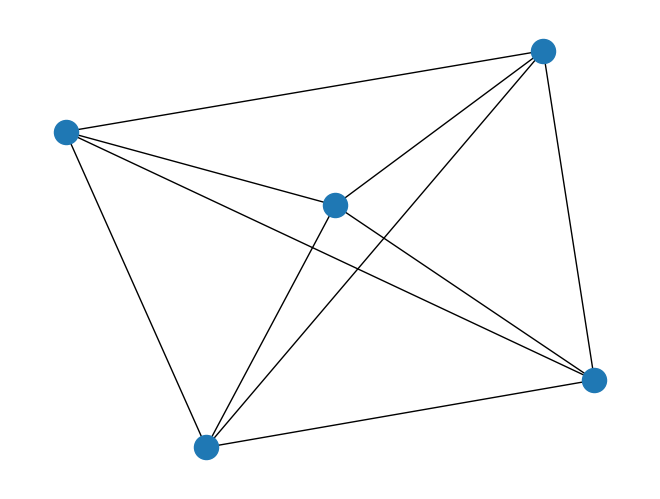

In [20]:
C = nx.complete_graph(5)
nx.draw(C)

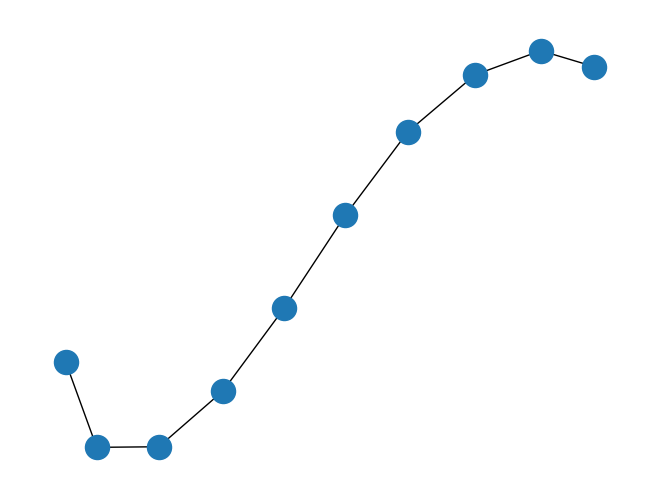

In [21]:
P = nx.path_graph(10)
nx.draw(P)

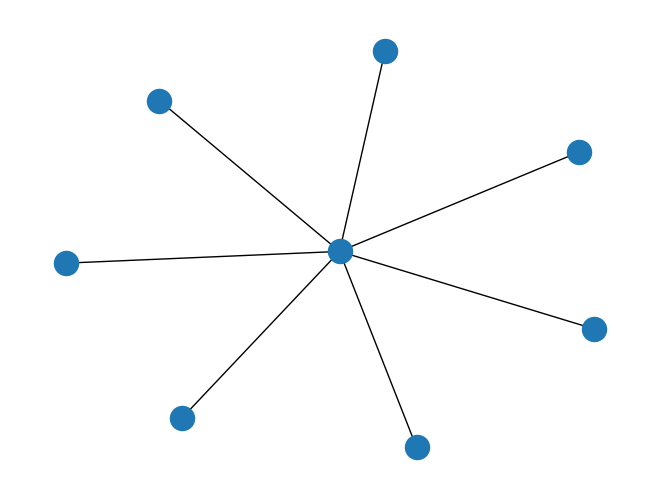

In [24]:
S = nx.star_graph(7)
nx.draw(S)

Try out these functions, what do they produce?
 - `nx.compose(C,P)`
 - `nx.cartesian_product(S,P)`
 - `nx.complement(S)`

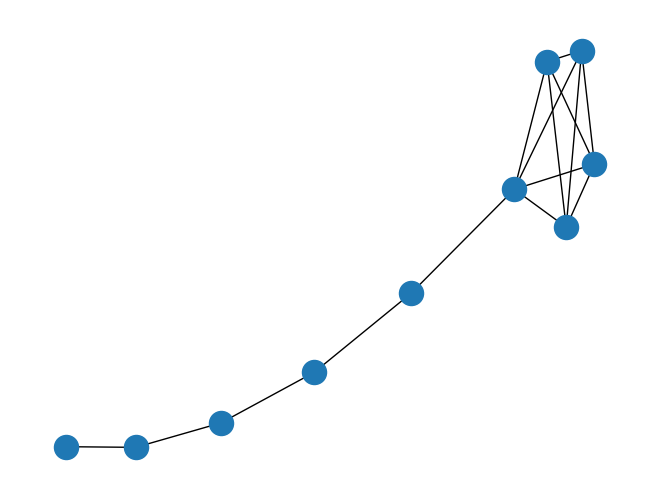

In [26]:
nx.draw(nx.compose(C,P))

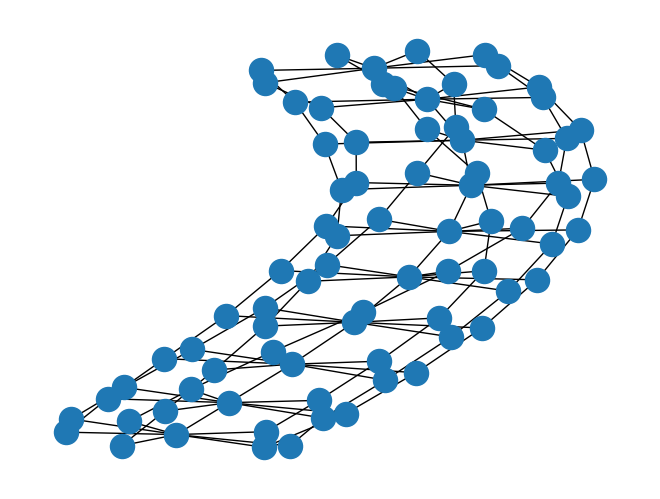

In [28]:
nx.draw(nx.cartesian_product(S,P))

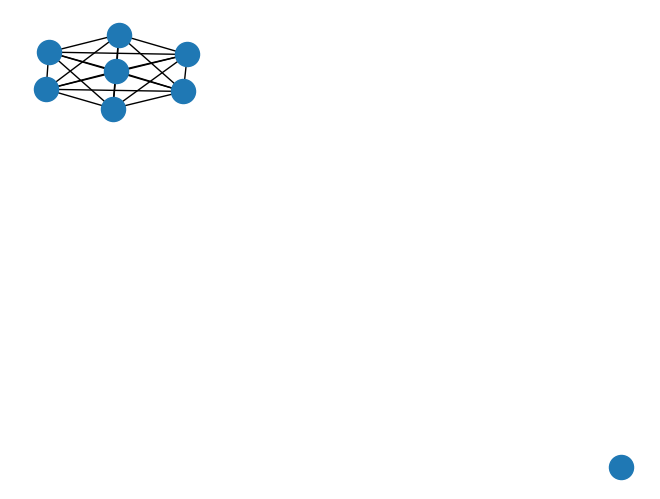

In [27]:
nx.draw(nx.complement(S))

### Exercises

To get ready for the next section let's write a function that implements the [Kronecker Graph of order k](http://arxiv.org/pdf/0812.4905v2.pdf). This is simply the `tensor_product` of a graph applied to itself k times.
That is, if we have a graph $G$, with adjacency matrix $A$ and kronecker product(tensor product) $\otimes$, the _Kronecker Graph_ of order $k$ is a graph with Adjacency matrix

$$(A)^k = \underbrace{A \otimes A \otimes \cdots \otimes A}_{ k \text{ terms}}$$


Let's also assume (as they do in the paper) that the kronecker graph always has self loops on all the nodes.

I'll give you the function stub and you can fill in the details

In [29]:
def kronecker_graph(G,k):
    
    K = nx.Graph(G) # For the kronecker graph we are going to return
    B = nx.Graph(G) # For the base graph 
    
    #Add self loops to both K and B
    for n in K: 
        K.add_edge(n, n)
        
    for n in B:
        B.add_edge(n, n)
        
    # Add the number of kronecker products here
    # Create K using the appropriate networkx product function
    for _ in range(k-1):
        K = nx.tensor_product(K, B)
    
    return K

Make a kronecker graph of order $k=2$ out of the Path graph `P` of size 2.

- how many nodes are in `kronecker_graph(P, 2)`?
- how many nodes are in `kronecker_graph(P, 3)`?

In [51]:
P = nx.star_graph(3)

KG = kronecker_graph(P, 2)
KG.order(), KG.size()

(16, 58)

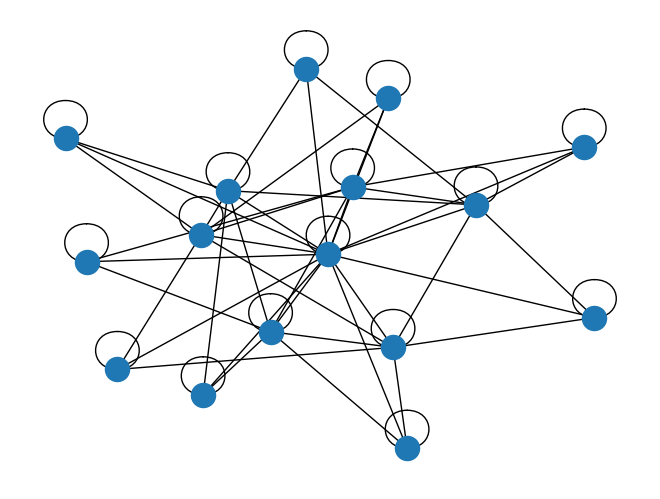

In [52]:
nx.draw(KG)

In [47]:
P = nx.path_graph(2)

KG = kronecker_graph(P, 3)
KG.order(), KG.size()

(8, 36)

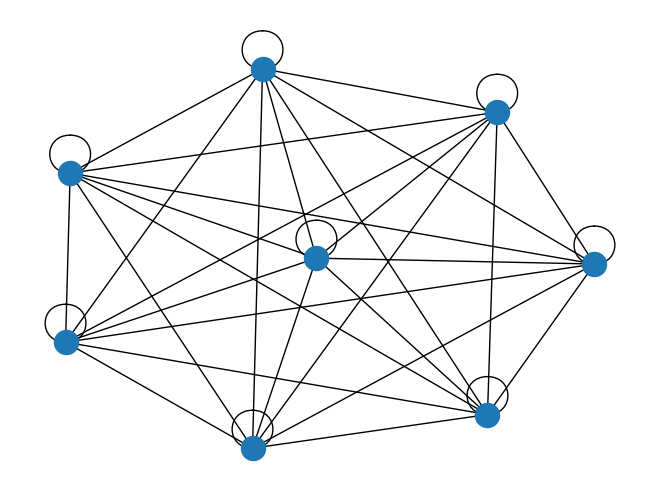

In [48]:
nx.draw(KG)

Create the adjacency matrix for the Path graph `P` of size 2, add self-loops manually, and build the adjacency matrix of the Kronecker Graph of order 2 from `P` manually using the `numpy.kron()` function. Verify if the resulting matrix is the same as the matrix produced by the `kronecker_graph()` function.

In [ ]:
import numpy as np

AP = np.array([[0, 1], [1, 0]])

n, n = AP.shape

for i in range(n):
    # add self loops

# build the kronecker product of AP

# build a graph from the kronecker product of AP

# print the number of nodes and edges